In [1]:
import string
from collections import Counter
import numpy as np

#import pygal
import matplotlib.pyplot as plt
import nltk
#nltk.download('vader_lexicon')

import pandas as pd

In [2]:
df = pd.read_csv("price.csv")
df1=df[['selftext','num_comments','score','title']]
df1=df1.dropna(subset=['selftext'])

#drop meaningless text
df1=df1[(df1.selftext!='[removed]') & (df1.selftext!='[deleted]')]
#df1=df1[(df1.selftext!=' [ ') & (df1.selftext!=' ')]

#drop duplicate
df1=df1.drop_duplicates(subset=['selftext']).reset_index()
df1

,index,selftext,num_comments,score,title
0,0,hey everyone girlfriend one first people canad...,0,1,SELLING: 2 Guaranteed Tomorrowland 2015 Ticket...
1,1,recently posted desolat opening context submit...,0,1,"Desolat, Loco Dice's Label, forwarded my mix t..."
2,2,favorite house producer overall like kyle wats...,3,1,Kyle Watson or Claude Vonstroke?
3,3,latest monthly deep house mix tampella industr...,0,1,[MIX MONDAY] Tampella 005 (deep house)
4,4,hi all coming need assistance sorting stag peo...,10,4,"Please help! Small festival, Europe, May-June?"
5,5,hi everyone may know persie edits series wonde...,1,1,HARD TO FIND - PERSIE EDITS SERIES
6,6,usually produce music emotional future bass ge...,0,1,Burgess - Defy Gravity (first house song I've ...
7,7,hi dj playing mostly house tech house techno l...,12,2,Suggest me house music featuring traditional A...
8,8,first off apology post go etiquette subreddit ...,20,4,Vinyl-only releases — what's a girl to do?
9,9,anyone insight find good production pack cost ...,6,1,Good Production Packs for Disco/Deep House?


In [3]:
df_word=pd.read_csv('EMOTION.csv')
df_word=df_word[df_word['emotion-intensity-score']>0.6]
df_word

,word,emotion,emotion-intensity-score
0,outraged,anger,0.964
1,brutality,anger,0.959
2,hatred,anger,0.953
3,hateful,anger,0.940
4,terrorize,anger,0.939
...,...,...,...
8758,inspired,trust,0.602
8759,brighten,trust,0.602
8760,sympathetic,trust,0.602
8761,fulfill,trust,0.602


In [4]:
set(df_word.emotion)

{'anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust'}

## Find specific emotional words

In [5]:
df_word[df_word.word == 'risk']

,word,emotion,emotion-intensity-score


In [6]:
df_word[df_word.word == 'account']

,word,emotion,emotion-intensity-score


In [7]:
df_word[df_word.word == 'time']

,word,emotion,emotion-intensity-score


In [8]:
df_word= df_word[df_word.word != 'fire']
df_word= df_word[df_word.word != 'account']

## General Barplot

In [9]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

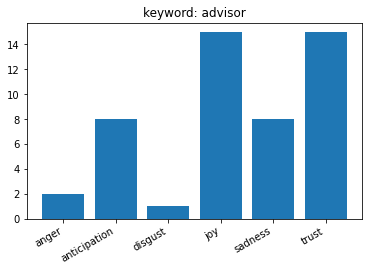

In [10]:
col = [x for x in df1['selftext']]
text = str(col)

lower_case = text.lower()
# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
tokenized_words = cleaned_text.split()
final_words = []
for word in tokenized_words:
    if word not in stop_words:
        final_words.append(word)
        

emotion_list = []
word=list(df_word.word)
emotion=list(df_word.emotion)

for i in range(len(df_word)):
    if word[i] in final_words:
        emotion_list.append(emotion[i])
            
w = Counter(emotion_list)
            
            
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.title('keyword: advisor')
plt.show()

In [11]:
def emo(tokens,emo):
    zip_iterator = zip(df_word.word, df_word.emotion)
    D= dict(zip_iterator)
    newDict = dict(filter(lambda x: x[1]== emo, D.items()))
    emotion_words=list(newDict.keys())
    List=list(itertools.chain(*tokens))
    
    result = []
    for word in List:
        if word in emotion_words:
            result.append(word)
    return result

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wordcloud(words):

    # Create a list of word
    text=' '.join(words)

    # Create the wordcloud object
    wordcloud = WordCloud(width=1500, height=1000, margin=0,background_color='white').generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

In [13]:
import nltk
lower_case = df1['selftext'].str.lower()
cleaned_text = lower_case.str.translate(str.maketrans('', '', string.punctuation))
tokens=cleaned_text.apply(lambda x: nltk.word_tokenize(x))
print(tokens)

0     [hey, everyone, girlfriend, one, first, people...
1     [recently, posted, desolat, opening, context, ...
2     [favorite, house, producer, overall, like, kyl...
3     [latest, monthly, deep, house, mix, tampella, ...
4     [hi, all, coming, need, assistance, sorting, s...
5     [hi, everyone, may, know, persie, edits, serie...
6     [usually, produce, music, emotional, future, b...
7     [hi, dj, playing, mostly, house, tech, house, ...
8     [first, off, apology, post, go, etiquette, sub...
9     [anyone, insight, find, good, production, pack...
10    [hi, all, said, looking, resellers, house, mus...
11    [hey, everyone, offering, variety, service, el...
12    [im, interested, know, much, booking, dj, cost...
13    [so, compiling, playlist, classic, house, stuf...
14    [regret, home, purchase, distance, bought, out...
Name: selftext, dtype: object


In [14]:
import itertools

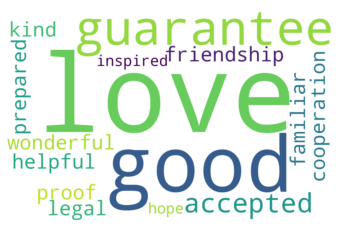

In [15]:

trust=emo(tokens,'trust')
wordcloud(trust)

In [16]:
Counter(trust).most_common(10)

[('love', 5),
 ('good', 3),
 ('guarantee', 2),
 ('accepted', 2),
 ('proof', 1),
 ('friendship', 1),
 ('wonderful', 1),
 ('cooperation', 1),
 ('helpful', 1),
 ('kind', 1)]

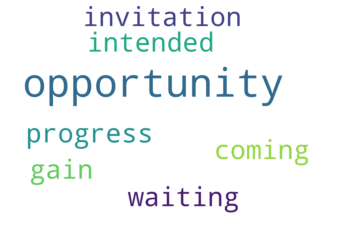

In [18]:
anticipation=emo(tokens,'anticipation')
wordcloud(anticipation)

In [19]:
Counter(anticipation).most_common(10)

[('opportunity', 3),
 ('waiting', 1),
 ('invitation', 1),
 ('coming', 1),
 ('progress', 1),
 ('intended', 1),
 ('gain', 1)]

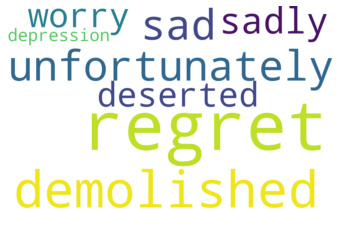

In [20]:
sadness=emo(tokens,'sadness')
wordcloud(sadness)

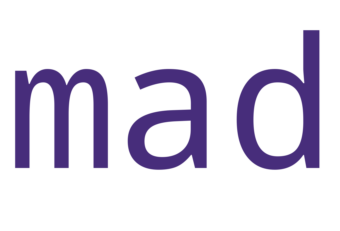

In [21]:
anger=emo(tokens,'anger')
wordcloud(anger)

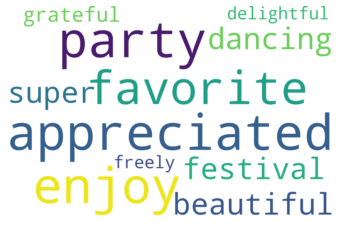

In [22]:
joy=emo(tokens,'joy')
wordcloud(joy)